# Higher Diploma in Science in Computing (Data Analytics)  

**University**: [Atlantic Technological University (ATU)](https://www.atu.ie/)  
**Module:** Programming for Data Analytics  
**Lecturer:** [Andrew Beatty](https://github.com/andrewbeattycourseware)  
**Author:** [Elaine R. Cazetta](https://github.com/elainecazetta)  

---

# Project: 
# Housing, Population, and Immigration Trends in Ireland: An Analysis Using Census Data  

This project is part of the Programming for Data Analytics module at ATU and uses Irish Census data to address the following research questions:  

- How has Ireland’s population changed over time across counties?  

- Has housing stock growth kept pace with population growth?  

- How has the non-Irish population changed over time and across regions?  

- Is there a relationship between population growth, immigration, and housing availability?  

---

## 1. Introduction  

This project analyses population, housing, and immigration trends in Ireland using Census data from 2006, 2011, 2016, and 2022. The aim is to examine how population growth and changes in immigration relate to housing availability across Irish counties. The analysis focuses on identifying long-term trends and regional differences using official data published by the [Central Statistics Office (CSO)](https://www.cso.ie/en/index.html).

---

## 2. Data Sources

This project uses data from the Central Statistics Office Ireland (CSO), sourced from the Irish Census for the years 2006, 2011, 2016, and 2022. All datasets were downloaded in CSV format from the CSO website.

The following [databases](https://data.cso.ie/) will be analysed in this project in orded to answer the proposed questions stated above:  

 - FY001 - provides total population figures by county and census year.     
 - FY002 - data containing the number of private households by county.  
 - FY004B - reports the average number of persons per private household.  
 - F5002 - provides a county-level breakdown of the population by citizenship for the years 2011, 2016, and 2022.

---

## 3. Data Preparation  

Census datasets were imported from CSV files and inspected for structure and consistency. Population, housing, and immigration data were filtered to retain relevant variables and standardised by county and census year. Data were cleaned to ensure consistent county naming and aligned census years, and derived metrics such as population growth and housing units per 1,000 people were calculated to support comparative analysis.  

---

## 4. Population Trends

This section analyses population changes across Irish counties between 2006 and 2022 using Census data. The aim is to identify long-term population trends and regional differences over time.  


In [1]:
# Imports

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Load population data and display the first few rows
pop_data = "FY001-population.csv"
pop_datadir = "data/"
population = pop_datadir + pop_data

pop_df = pd.read_csv(population)

print(pop_df.head(10))

             Statistic Label  CensusYear   County         Sex    UNIT    VALUE
0  Population at Each Census        2006    State  Both sexes  Number  4239848
1  Population at Each Census        2006    State        Male  Number  2121171
2  Population at Each Census        2006    State      Female  Number  2118677
3  Population at Each Census        2006   Carlow  Both sexes  Number    50349
4  Population at Each Census        2006   Carlow        Male  Number    25611
5  Population at Each Census        2006   Carlow      Female  Number    24738
6  Population at Each Census        2006   Dublin  Both sexes  Number  1187176
7  Population at Each Census        2006   Dublin        Male  Number   582557
8  Population at Each Census        2006   Dublin      Female  Number   604619
9  Population at Each Census        2006  Kildare  Both sexes  Number   186335


In [3]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  324 non-null    object
 1   CensusYear       324 non-null    int64 
 2   County           324 non-null    object
 3   Sex              324 non-null    object
 4   UNIT             324 non-null    object
 5   VALUE            324 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 15.3+ KB


In [4]:
#  Show unique counties in the dataset
pop_df["County"].unique()

array(['State', 'Carlow', 'Dublin', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork', 'Kerry', 'Limerick', 'Tipperary',
       'Waterford', 'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo',
       'Cavan', 'Donegal', 'Monaghan'], dtype=object)

In [5]:
# Drop unnecessary columns
pop_df.drop(columns=["Statistic Label", "UNIT"], inplace=True)

print(pop_df.head(10))

   CensusYear   County         Sex    VALUE
0        2006    State  Both sexes  4239848
1        2006    State        Male  2121171
2        2006    State      Female  2118677
3        2006   Carlow  Both sexes    50349
4        2006   Carlow        Male    25611
5        2006   Carlow      Female    24738
6        2006   Dublin  Both sexes  1187176
7        2006   Dublin        Male   582557
8        2006   Dublin      Female   604619
9        2006  Kildare  Both sexes   186335


In [6]:
# Rename columns for clarity
pop_df.rename(columns={'VALUE': 'Population'}, inplace=True)

print(pop_df.head())

   CensusYear  County         Sex  Population
0        2006   State  Both sexes     4239848
1        2006   State        Male     2121171
2        2006   State      Female     2118677
3        2006  Carlow  Both sexes       50349
4        2006  Carlow        Male       25611


In [7]:
# Keep total population only (Both sexes)
pop_df = pop_df[pop_df["Sex"] == "Both sexes"]

print(pop_df.head())

    CensusYear    County         Sex  Population
0         2006     State  Both sexes     4239848
3         2006    Carlow  Both sexes       50349
6         2006    Dublin  Both sexes     1187176
9         2006   Kildare  Both sexes      186335
12        2006  Kilkenny  Both sexes       87558


In [8]:
# Sort by County and CensusYear
pop_df = pop_df.sort_values(by=["County", "CensusYear"])
print(pop_df.head(10))


     CensusYear  County         Sex  Population
3          2006  Carlow  Both sexes       50349
84         2011  Carlow  Both sexes       54612
165        2016  Carlow  Both sexes       56932
246        2022  Carlow  Both sexes       61968
72         2006   Cavan  Both sexes       64003
153        2011   Cavan  Both sexes       73183
234        2016   Cavan  Both sexes       76176
315        2022   Cavan  Both sexes       81704
39         2006   Clare  Both sexes      110950
120        2011   Clare  Both sexes      117196


In [9]:
# Calculate population growth percentage by county
pop_df["Population_Growth_%"] = (
    pop_df.groupby("County")["Population"].pct_change() * 100
)

print(pop_df.head(10))


     CensusYear  County         Sex  Population  Population_Growth_%
3          2006  Carlow  Both sexes       50349                  NaN
84         2011  Carlow  Both sexes       54612             8.466901
165        2016  Carlow  Both sexes       56932             4.248151
246        2022  Carlow  Both sexes       61968             8.845640
72         2006   Cavan  Both sexes       64003                  NaN
153        2011   Cavan  Both sexes       73183            14.343078
234        2016   Cavan  Both sexes       76176             4.089748
315        2022   Cavan  Both sexes       81704             7.256879
39         2006   Clare  Both sexes      110950                  NaN
120        2011   Clare  Both sexes      117196             5.629563


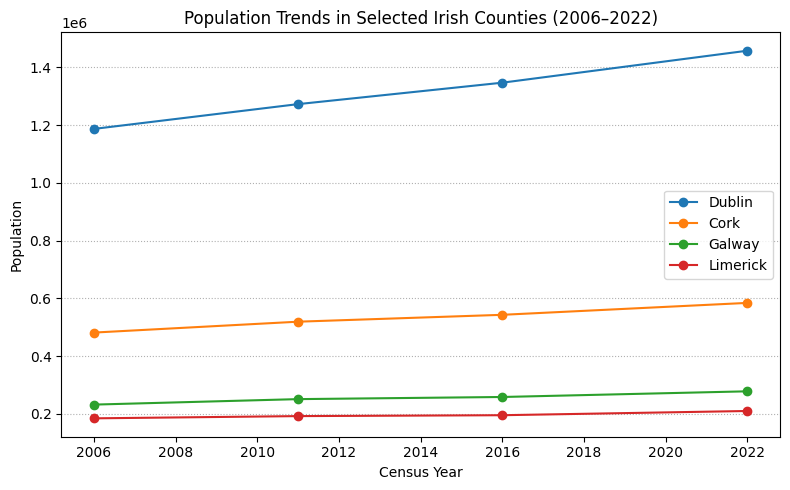

In [10]:
# Select a few counties to plot
selected_counties = ["Dublin", "Cork", "Galway", "Limerick"]

plot_df = pop_df[pop_df["County"].isin(selected_counties)]

plt.figure(figsize=(8, 5))
for county in selected_counties:
    county_data = plot_df[plot_df["County"] == county]
    plt.plot(county_data["CensusYear"], county_data["Population"], marker="o", label=county)

plt.title("Population Trends in Selected Irish Counties (2006–2022)")
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.grid(axis='y', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

**Key observations:**
- Population increased in all selected counties between 2006 and 2022.
- Dublin City shows the highest population levels across all census years.
- Population growth is evident across both urban and regional counties.


---

## 5. Housing Trends

---

## 6. Immigration Patterns

---

## 7. Combined Analysis

---

## 8. Conclusions

---

### 🔹Question 1 – Population growth  
- How has Ireland’s population changed over time across counties?

---

### 🔹Question 2 – Housing vs population  
- Has housing stock growth kept pace with population growth?

---

### 🔹Question 3 – Immigration patterns  
- How has the non-Irish population changed over time and across regions?

---

### 🔹Question 4 – Housing pressure & immigration  
- Is there a relationship between population growth, immigration, and housing availability?

---

## End

---